<a href="https://colab.research.google.com/github/ThomasGVoss/LearningFactory/blob/main/Lab_Data_Prep_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **CR**oss *I*ndustry *S*tandard **P**rocess for **D**ata **M**ining (CRISP-DM) is a process model that serves as the base for a data science process. It has six sequential phases:



1.   Business understanding – What does the business need?
2.   Data understanding – What data do we have / need? Is it clean?
3.   Data preparation – How do we organize the data for modeling?
4.   Modeling – What modeling techniques should we apply?
5.   Evaluation – Which model best meets the business objectives?
6.   Deployment – How do stakeholders access the results?


Published in 1999 to standardize data mining processes across industries, it has since become the most common methodology for data mining, analytics, and data science projects.

## Phase 1: Business Understanding

The Business Understanding phase focuses on understanding the objectives and requirements of the project. Aside from the third task, the three other tasks in this phase are foundational project management activities that are universal to most projects:

**Determine business objectives:** You should first “thoroughly understand, from a business perspective, what the customer really wants to accomplish.” (CRISP-DM Guide) and then define business success criteria.

**Assess situation:** Determine resources availability, project requirements, assess risks and contingencies, and conduct a cost-benefit analysis.

**Determine data mining goals:** In addition to defining the business objectives, you should also define what success looks like from a technical data mining perspective.

**Produce project plan:** Select technologies and tools and define detailed plans for each project phase.

While many teams hurry through this phase, establishing a strong business understanding is like building the foundation of a house – absolutely essential.

This enables close coordination between technical department of Data Scientists, Data Analysts and Data Engineers with business stakeholders.

## Phase 2: Data Understanding


Next is the Data Understanding phase. Adding to the foundation of Business Understanding, it drives the focus to identify, collect, and analyze the data sets that can help you accomplish the project goals. This phase also has four tasks:

Collect initial data: Acquire the necessary data and (if necessary) load it into your analysis tool.
Describe data: Examine the data and document its surface properties like data format, number of records, or field identities.
Explore data: Dig deeper into the data. Query it, visualize it, and identify relationships among the data.
Verify data quality: How clean/dirty is the data? Document any quality issues.

In [1]:
import numpy as np                                # For matrix operations and numerical processing
import pandas as pd                               # For munging tabular data
import matplotlib.pyplot as plt                   # For charts and visualizations
from IPython.display import Image                 # For displaying images in the notebook
from IPython.display import display               # For displaying outputs in the notebook
from time import gmtime, strftime                 # For labeling SageMaker models, endpoints, etc.
import sys                                        # For writing outputs to notebook
import math                                       # For ceiling function
import json                                       # For parsing hosting outputs
import os                                         # For manipulating filepath names
import zipfile                                    # For unzipping

# ensure graphs are displayed correctly inline in this notebook
%matplotlib inline

Collecting and Loading the data

In [2]:
!wget https://raw.githubusercontent.com/ThomasGVoss/LearningFactory/main/apjournal.csv
!wget https://raw.githubusercontent.com/ThomasGVoss/LearningFactory/main/kundenauftrag.csv
!wget https://raw.githubusercontent.com/ThomasGVoss/LearningFactory/main/produktionsauftrag.csv


--2022-09-29 05:17:23--  https://raw.githubusercontent.com/ThomasGVoss/LearningFactory/main/apjournal.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 297142 (290K) [text/plain]
Saving to: ‘apjournal.csv’

apjournal.csv       100%[===================>] 290.18K  --.-KB/s    in 0.03s   

2022-09-29 05:17:24 (9.19 MB/s) - ‘apjournal.csv’ saved [297142/297142]

--2022-09-29 05:17:24--  https://raw.githubusercontent.com/ThomasGVoss/LearningFactory/main/kundenauftrag.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 277956 (271K) [

In [3]:
col = ['ProcessID','RoundId','Workstation','Null','Start','End']
data = pd.read_csv('/content/apjournal.csv', header=None, names=col, index_col=0 , sep=',',on_bad_lines='skip')
pd.set_option('display.max_columns', 500)   # Make sure we can see all of the columns
pd.set_option('display.max_rows', 20) # Keep the output on one page
data = data.drop(columns='Null')
#last output of a cell is automatically displayed in this case the pandas DataFrame
data

,ProcessID,RoundId,Workstation,Start,End
1,76,31,1,2018-01-10 21:00:50,2018-01-10 21:05:09
2,76,31,1,2018-01-10 21:05:16,2018-01-10 21:05:21
3,77,31,1,2018-01-10 21:13:29,2018-01-10 21:13:56
4,78,31,1,2018-01-10 21:20:21,2018-01-12 15:59:51
5,78,31,2,2018-01-10 21:20:33,2018-01-10 21:20:35
...,...,...,...,...,...
4217,1762,216,2,2022-09-02 20:05:56,2022-09-02 20:07:07
4218,1759,216,5,2022-09-02 20:06:51,2022-09-02 20:07:20
4219,1762,216,3,2022-09-02 20:07:09,2022-09-02 20:07:31
4220,1762,216,4,2022-09-02 20:07:46,2022-09-02 20:08:12


Let's take a look into the round we played and talk about the data. 



In [4]:
data = data.loc[data['RoundId'] == 216]

#Task: 

Please think back on the game and match your experience from the game with the data set you have been presented with. Please generate a description of the data. What are the Rows and Collums representing, what type of values are you looking at? 

Below you find some examples of ways to access the data.


In [5]:
data['Start'] = pd.to_datetime(data['Start'])
#data['End'] = pd.to_datetime(data['End'])
data['End'] = data['End'].astype('datetime64[ns]')
data.dtypes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ProcessID               int64
RoundId                 int64
Workstation             int64
Start          datetime64[ns]
End            datetime64[ns]
dtype: object

In [6]:
# Select a column
ws = data['Workstation']
ws

4125    1
4126    2
4127    1
4128    1
4129    3
       ..
4217    2
4218    5
4219    3
4220    4
4221    5
Name: Workstation, Length: 97, dtype: int64

In [7]:
data.sort_values(by="Start")

,ProcessID,RoundId,Workstation,Start,End
4125,1745,216,1,2022-09-02 19:29:26,2022-09-02 19:30:27
4126,1745,216,2,2022-09-02 19:30:29,2022-09-02 19:32:32
4127,1746,216,1,2022-09-02 19:30:36,2022-09-02 19:32:01
4128,1747,216,1,2022-09-02 19:32:23,2022-09-02 19:33:21
4129,1745,216,3,2022-09-02 19:32:35,2022-09-02 19:34:29
...,...,...,...,...,...
4217,1762,216,2,2022-09-02 20:05:56,2022-09-02 20:07:07
4218,1759,216,5,2022-09-02 20:06:51,2022-09-02 20:07:20
4219,1762,216,3,2022-09-02 20:07:09,2022-09-02 20:07:31
4220,1762,216,4,2022-09-02 20:07:46,2022-09-02 20:08:12


In [8]:
# Grouping
data.groupby('Workstation').size()

Workstation
1    18
2    17
3    18
4    25
5    19
dtype: int64

In [9]:
#Generate the duration based on the end and the start date
data['Duration'] = data['End'] - data['Start']

# Series.dt - Accessor object for datetimelike properties of the Series values.
data['Seconds'] = data['Duration'].dt.total_seconds()

#drop the duration col 
data = data.drop(columns=['Duration'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# Exploration 
 
Let's start exploring the data. First, let's understand how the features are distributed.

In [10]:
data.describe()

,ProcessID,RoundId,Workstation,Seconds
count,97.000000,97.0,97.000000,96.000000
mean,1752.680412,216.0,3.103093,75.302083
std,5.312223,0.0,1.403007,73.804738
min,1745.000000,216.0,1.000000,1.000000
25%,1748.000000,216.0,2.000000,30.500000
50%,1753.000000,216.0,3.000000,62.000000
75%,1757.000000,216.0,4.000000,94.000000
max,1762.000000,216.0,5.000000,414.000000


In [11]:
data['ProcessID'] = data['ProcessID'].astype("category")
data['Workstation'] = data['Workstation'].astype("category")

In [12]:
# let's find the mean value of each process step 
data.groupby(['Workstation']).mean()

,RoundId,Seconds
Workstation,,
1,216.0,62.764706
2,216.0,67.823529
3,216.0,98.611111
4,216.0,98.160000
5,216.0,41.052632


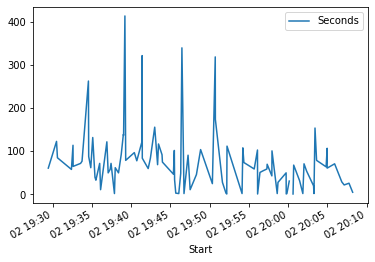

In [13]:
data.plot(x='Start',y='Seconds')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa69b9f1490>],
      dtype=object)

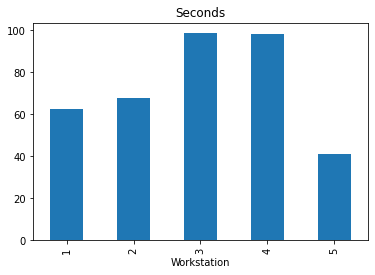

In [14]:
data.groupby(['Workstation'])['Seconds'].mean().plot.bar(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa69b4d3890>],
      dtype=object)

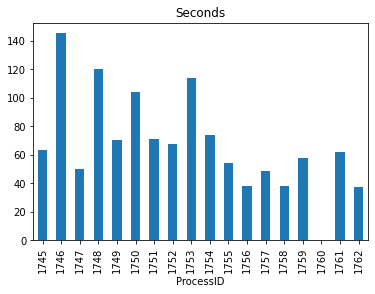

In [15]:
data.groupby(['ProcessID'])['Seconds'].mean().plot.bar(subplots=True)

In [ ]:
data.groupby(['ProcessID']).apply(print)

## Task: 
Please take a look at the Produktionsauftrag.csv - what can you find out? 

## Phase 3: Data Preparation 
Transformation / Feature engineering

---


Cleaning up data is part of nearly every machine learning project. It takes up a lot of time and is a necessity for a good model.

**Select data:** Determine which data sets will be used and document reasons for inclusion/exclusion.

**Clean data:** Often this is the lengthiest task. Without it, you’ll likely fall victim to garbage-in, garbage-out. A common practice during this task is to correct, impute, or remove erroneous values.

**Construct data:** Derive new attributes that will be helpful. For example, derive someone’s body mass index from height and weight fields.

**Integrate data:** Create new data sets by combining data from multiple sources.

**Format data:** Re-format data as necessary. For example, you might convert string values that store numbers to numeric values so that you can perform mathematical operations.

Using the data can you match the ProcessID with a variant?

can you group the data based on the type of car and the workstation used? 

Can you maybe add more steps to the data set? Such as the start and the end? 

In [ ]:
# for each ProcessID add 2 rows to the datatable with station PPS and Storage? 
# think which time would be usefull? In which table would you find those data items? 


## End of Lab 1
We now have gained an understanding of our data and prepared our data ...

Please download the file after generation for further processing

In [ ]:
data.to_csv('output.csv')